In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap
pd.options.display.max_rows = 100

In [8]:
df = pd.read_csv('/Users/youssefalyakoob/Desktop/Kickstarter Project/Kickstarter20_21_Consolidated_v2.csv')

In [11]:
df.head()

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,...,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1600.00,25,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3000.00,15,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.00,12,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df.head()

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,...,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1600.00,25,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3000.00,15,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.00,12,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##Train/Test Split for models

In [12]:
target = 'success'
y = df[target]
X = df.drop(columns=target)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state=42) #70/15/15 split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.15, random_state=42)

##Establish Baseline

In [15]:
y_train.value_counts(normalize=True)
print('Baseline Accuracy Score:', 0.58)

Baseline Accuracy Score: 0.58


##Random Forest

In [16]:
#out of the box random forest model 
model_rf = make_pipeline(
    RandomForestClassifier(n_estimators=50, random_state=42)
)
model_rf.fit(X_train, y_train) #fitting to balanced training data

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [17]:
print('Training Accuracy:', model_rf.score(X_train, y_train))
print('Validation Accuracy:', model_rf.score(X_val, y_val))

Training Accuracy: 0.8459409948629918
Validation Accuracy: 0.6608957607433217


##Hyperparameter Tuning for Random Forest 

In [18]:
#randomized grid search to find best parameters for our random forest model 
pipeline = make_pipeline(
    RandomForestClassifier(random_state=42)
)
parameters = {
              'randomforestclassifier__min_samples_leaf':randint(1,1000),
              'randomforestclassifier__n_estimators':randint(50,500),
              'randomforestclassifier__max_depth': [5,10,15,20,None],
              'randomforestclassifier__min_samples_split':[2,5,10,20],
              'randomforestclassifier__criterion':['gini', 'entropy'],
              'randomforestclassifier__max_features': uniform(0,1)

              }

search = RandomizedSearchCV(
    pipeline,
    parameters,
    n_iter = 10,
    cv = 3,
    scoring = 'accuracy',
    verbose = 10,
    return_train_score = True,
    n_jobs = -1
)

search.fit(X_train, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              None],
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc123045af0>,
                                        'ra

##Evaluation metrics for tuned random forest

####Accuracy Score

In [19]:
print('Training Accuracy:', search.score(X_train, y_train))
print('Validation Accuracy:', search.score(X_val, y_val))

Training Accuracy: 0.7054803294859149
Validation Accuracy: 0.6994410569105691


In [20]:
search.best_params_ #best parameters for random forest model

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': 0.6101793461705033,
 'randomforestclassifier__min_samples_leaf': 63,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 379}

In [21]:
print('The best accuracy score for the grid search is: ', search.best_score_)

The best accuracy score for the grid search is:  0.6996067303119656


####Feature Importance

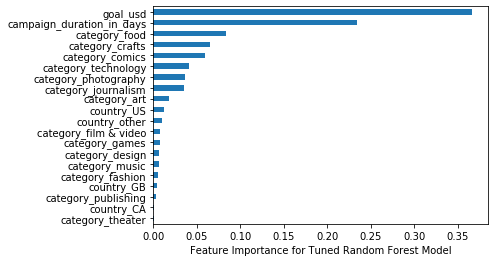

In [22]:
bestimator = search.best_estimator_
importances = bestimator.named_steps['randomforestclassifier'].feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.plot(kind='barh')
plt.xlabel('Feature Importance for Tuned Random Forest Model');

This feature importance plot indicates that funding goal amount for a campaign and campaign duration are the most predictive features for our model.

####Confusion Matrix 

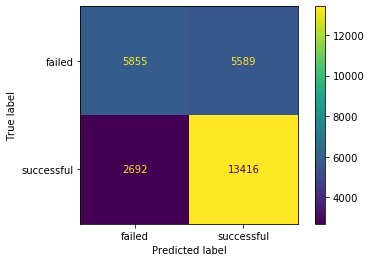

In [23]:
plot_confusion_matrix(bestimator, X_val, y_val,display_labels=['failed', 'successful'], values_format='.0f')

##XG Boost Classifier  

In [24]:
#out of the box random forest model 
model_xgb = make_pipeline(
    XGBClassifier(random_state=42,n_jobs=-1)
)

model_xgb.fit(X_train,y_train)

[23:52:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [25]:
print('Training Accuracy:', model_xgb.score(X_train,y_train))
print('Validation Accuracy:', model_xgb.score(X_val, y_val))

Training Accuracy: 0.7150882002536478
Validation Accuracy: 0.7013283972125436


##Hyperparameter Tuning for XGB Classifier

In [26]:
model2_xgb = XGBClassifier()
learning_rates = [0.1,0.3,0.5,0.7,0.9,1]
n_estimators = randint(50,500)
max_depth = [3,5,10,15,20,None]
min_child_weights = [1,2,5,10,20]
subsamples = [0.5,0.7,0.8,1]
grid = dict(learning_rate = learning_rates, n_estimators = n_estimators, min_child_weight = min_child_weights, subsample = subsamples)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = RandomizedSearchCV(estimator=model2_xgb, param_distributions=grid, n_jobs = -1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

[00:59:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
grid_search.best_params_

{'learning_rate': 0.1,
 'min_child_weight': 1,
 'n_estimators': 166,
 'subsample': 0.8}

##Evaluation metrics for tuned XGB Classifier

####Accuracy Score

In [28]:
print('Training Accuracy:', grid_search.score(X_train, y_train))
print('Validation Accuracy:', grid_search.score(X_val,y_val))

Training Accuracy: 0.7108030898912389
Validation Accuracy: 0.7003121370499419


####Feature Selection using Permutation Importance

In [29]:
bestimator_xgb = grid_search.best_estimator_

In [30]:
perm_imp = permutation_importance(bestimator_xgb, X_val, y_val, random_state=42)

In [31]:
data = {'imp_mean':perm_imp['importances_mean'],
        'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data, index=X_val.columns).sort_values(by='imp_mean')

Text(0.5, 0, 'Permutation Importance for Tuned XGB Classifier')

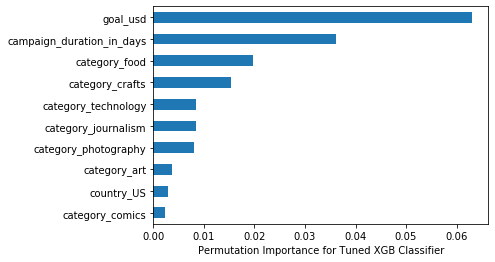

In [32]:
df_perm['imp_mean'].tail(10).plot(kind='barh')
plt.xlabel('Permutation Importance for Tuned XGB Classifier')

####Confusion Matrix

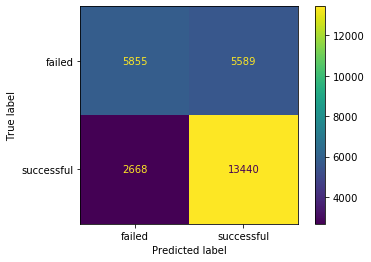

In [33]:
plot_confusion_matrix(bestimator_xgb, X_val,y_val, display_labels=['failed', 'successful'], values_format='.0f')

####Partial Dependence for XGB Classifier

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc0ed0d70d0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc0ed0da610>})

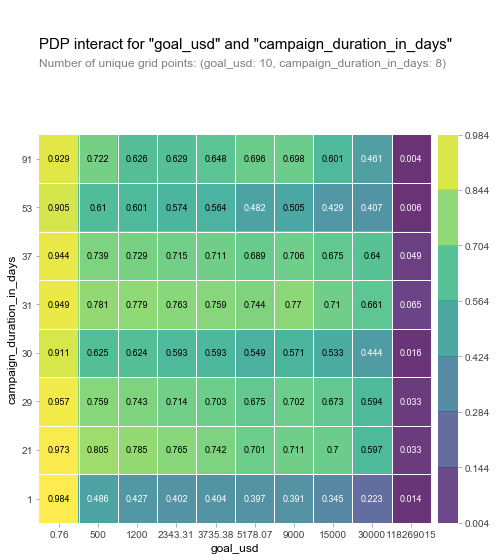

In [34]:
features = ['goal_usd', 'campaign_duration_in_days']
interact = pdp_interact(bestimator_xgb,
                        dataset = X_val,
                        model_features = X.columns,
                        features=features)

pdp_interact_plot(interact, plot_type='grid', feature_names=features)

####Shapley Plots for XGB Classifier 

In [35]:
df.head()

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,...,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1600.00,25,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3000.00,15,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.00,12,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
samp = df.head(2)
samp

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,...,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
model3_xgb = XGBClassifier(random_state=42, n_jobs=-1,learning_rate = 0.3,
 min_child_weight=10, n_estimators=284, subsample= 1)
model3_xgb.fit(X_train,y_train)

[01:21:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=284, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
explainer = shap.TreeExplainer(model3_xgb)
shap_values = explainer.shap_values(X_train.loc[0])

shap.initjs()
shap.force_plot(base_value=explainer.expected_value,
                shap_values=shap_values,
                features = X_train.loc[0])
#shapley plot for failed campaign

In [66]:
X_train.loc[0];

In [64]:
y_train.loc[1]

1

In [65]:
explainer = shap.TreeExplainer(model3_xgb)
shap_values = explainer.shap_values(X_train.loc[1])

shap.initjs()
shap.force_plot(base_value=explainer.expected_value,
                shap_values=shap_values,
                features = X_train.loc[1])
#shapley plot for successful campaign

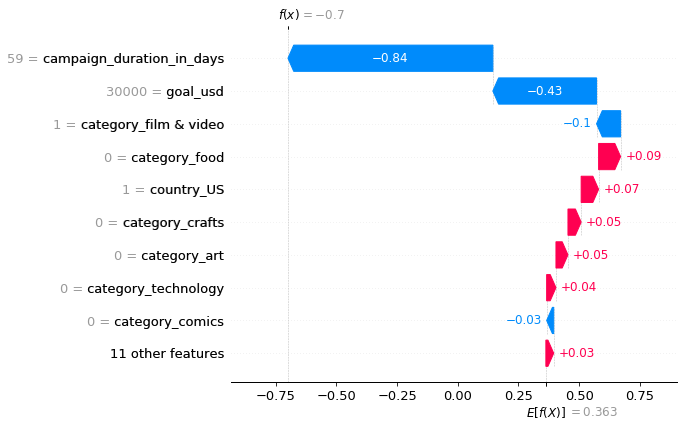

In [67]:
explainer = shap.TreeExplainer(model3_xgb)
shap_values=explainer(X_train)
shap.plots.waterfall(shap_values[0])

In [38]:
#Accuracy of XGB Classifier on testing data
print('Test Accuracy:', bestimator_xgb.score(X_test,y_test))

Test Accuracy: 0.7003121370499419


In [49]:
#saving best model
import pickle
saved_model_xgb = pickle.dumps(bestimator_xgb)

In [100]:
bestimator_xgb.save_model('xbg_bestimator.bin')

In [50]:
import joblib
joblib_file = 'joblib_bestimator_XGB.pkl'
joblib.dump(bestimator_xgb,'xgb_model')

['xgb_model']

In [98]:
# load_xgb_model = joblib.load('/content/xgb_model')

##Artificial Neural Networks

####Feature Scailing for NN

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [72]:
X_train_scaled.shape

(156122, 20)

In [42]:
model = Sequential()

model.add(Dense(units=20, activation='relu'))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
model.fit(x = X_train_scaled,
          y = y_train,
          epochs = 100,
          validation_data=(X_val_scaled, y_val), verbose=1
          )

Epoch 1/100
4879/4879 [==============================] - 4s 733us/step - loss: 0.6172 - val_loss: 0.6110
Epoch 2/100
4879/4879 [==============================] - 3s 700us/step - loss: 0.6068 - val_loss: 0.6030
Epoch 3/100
4879/4879 [==============================] - 3s 689us/step - loss: 0.6014 - val_loss: 0.6015
Epoch 4/100
4879/4879 [==============================] - 3s 706us/step - loss: 0.5991 - val_loss: 0.5994
Epoch 5/100
4879/4879 [==============================] - 4s 718us/step - loss: 0.5978 - val_loss: 0.5976
Epoch 6/100
4879/4879 [==============================] - 4s 719us/step - loss: 0.5962 - val_loss: 0.5965
Epoch 7/100
4879/4879 [==============================] - 4s 734us/step - loss: 0.5955 - val_loss: 0.5981
Epoch 8/100
4879/4879 [==============================] - 3s 711us/step - loss: 0.5949 - val_loss: 0.5949
Epoch 9/100
4879/4879 [==============================] - 4s 729us/step - loss: 0.5940 - val_loss: 0.5956
Epoch 10/100
4879/4879 [==============================]

In [44]:
model_loss = pd.DataFrame(model.history.history)

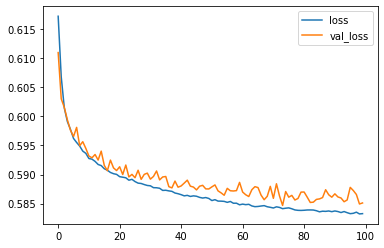

In [45]:
model_loss.plot()

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
model = Sequential()
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.2)) #20% dropout 
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.fit(x=X_train_scaled,
          y=y_train,
          epochs = 100,
          validation_data=(X_val_scaled, y_val), verbose=1
          )

Epoch 1/100
4879/4879 [==============================] - 5s 951us/step - loss: 0.6294 - accuracy: 0.6549 - val_loss: 0.6129 - val_accuracy: 0.6706
Epoch 2/100
4879/4879 [==============================] - 4s 905us/step - loss: 0.6152 - accuracy: 0.6689 - val_loss: 0.6096 - val_accuracy: 0.6723
Epoch 3/100
4879/4879 [==============================] - 4s 813us/step - loss: 0.6103 - accuracy: 0.6739 - val_loss: 0.6037 - val_accuracy: 0.6796
Epoch 4/100
4879/4879 [==============================] - 4s 882us/step - loss: 0.6069 - accuracy: 0.6766 - val_loss: 0.6008 - val_accuracy: 0.6817
Epoch 5/100
4879/4879 [==============================] - 4s 763us/step - loss: 0.6057 - accuracy: 0.6782 - val_loss: 0.6024 - val_accuracy: 0.6794
Epoch 6/100
4879/4879 [==============================] - 4s 769us/step - loss: 0.6047 - accuracy: 0.6785 - val_loss: 0.6001 - val_accuracy: 0.6839
Epoch 7/100
4879/4879 [==============================] - 4s 762us/step - loss: 0.6044 - accuracy: 0.6798 - val_loss: 0

In [87]:
df.columns

Index(['goal_usd', 'campaign_duration_in_days', 'success', 'category_art',
       'category_music', 'category_crafts', 'category_comics', 'category_food',
       'category_publishing', 'category_technology', 'category_journalism',
       'category_design', 'category_film & video', 'category_theater',
       'category_games', 'category_photography', 'category_fashion',
       'country_GB', 'country_US', 'country_CA', 'country_other'],
      dtype='object')

In [88]:
df.head()

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1600.00,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3000.00,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.00,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [91]:
df.goal_usd.min()

0.01

In [92]:
df.goal_usd.max()

152350076.0

In [56]:
X_train.columns

Index(['goal_usd', 'campaign_duration_in_days', 'category_art',
       'category_music', 'category_crafts', 'category_comics', 'category_food',
       'category_publishing', 'category_technology', 'category_journalism',
       'category_design', 'category_film & video', 'category_theater',
       'category_games', 'category_photography', 'category_fashion',
       'country_GB', 'country_US', 'country_CA', 'country_other'],
      dtype='object')